## 1. Import Libraries

In [44]:
import pandas as pd
import numpy as np
import sys
import os

# Add src directory to path
sys.path.append('../src')

# Import preprocessing functions
from preprocess import preprocess_text, preprocess_skills_column

# Import ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [45]:
# Load the dataset
df = pd.read_csv('../dataset/skills_dataset.csv')
print(f"Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns")
df.head()

Dataset loaded: 40 records, 2 columns


,skills,job_role
0,python,ml engineer
1,python numpy pandas,data analyst
2,python deep learning tensorflow,ai engineer
3,sql excel powerbi,data analyst
4,java spring sql,backend developer


## 3. Text Preprocessing

In [46]:
# Show original skills examples
print("Original Skills (sample):")
print(df['skills'].head(10).to_string())

Original Skills (sample):
0                               python
1                  python numpy pandas
2      python deep learning tensorflow
3                    sql excel powerbi
4                      java spring sql
5                  html css javascript
6    python sklearn data visualization
7             python nlp deep learning
8                javascript react node
9               python django rest api


In [47]:
# Apply preprocessing to skills column
df['skills_clean'] = df['skills'].apply(preprocess_text)
print("Preprocessing completed!")
print("\nCleaned Skills (sample):")
print(df['skills_clean'].head(10).to_string())

Preprocessing completed!

Cleaned Skills (sample):
0                               python
1                  python numpy pandas
2      python deep learning tensorflow
3                    sql excel powerbi
4                      java spring sql
5                  html css javascript
6    python sklearn data visualization
7             python nlp deep learning
8                javascript react node
9               python django rest api


In [48]:
# Compare original vs cleaned
comparison = pd.DataFrame({
    'Original': df['skills'].head(10),
    'Cleaned': df['skills_clean'].head(10)
})
print("Before and After Preprocessing:")
comparison

Before and After Preprocessing:


,Original,Cleaned
0,python,python
1,python numpy pandas,python numpy pandas
2,python deep learning tensorflow,python deep learning tensorflow
3,sql excel powerbi,sql excel powerbi
4,java spring sql,java spring sql
5,html css javascript,html css javascript
6,python sklearn data visualization,python sklearn data visualization
7,python nlp deep learning,python nlp deep learning
8,javascript react node,javascript react node
9,python django rest api,python django rest api


## 4. TF-IDF Feature Extraction

In [49]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=100,  # Limit to top 100 features
    ngram_range=(1, 2),  # Use unigrams and bigrams
    min_df=1,  # Minimum document frequency
    max_df=0.8  # Maximum document frequency (ignore very common terms)
)

print("TF-IDF Vectorizer initialized")
print(f"Configuration: max_features=100, ngram_range=(1,2)")

TF-IDF Vectorizer initialized
Configuration: max_features=100, ngram_range=(1,2)


In [50]:
# Fit and transform the cleaned skills
X = tfidf.fit_transform(df['skills_clean'])

print(f"Feature matrix shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Feature matrix shape: (40, 100)
Number of samples: 40
Number of features: 100


In [51]:
# Get feature names
feature_names = tfidf.get_feature_names_out()
print(f"\nTotal features extracted: {len(feature_names)}")
print(f"\nFirst 20 features:")
print(feature_names[:20])


Total features extracted: 100

First 20 features:
['airflow' 'aws' 'css' 'css javascript' 'data' 'data extraction'
 'data science' 'data visualization' 'database' 'database design' 'deep'
 'deep learning' 'excel' 'html' 'html css' 'java' 'java spring'
 'javascript' 'javascript react' 'keras']


In [52]:
# Convert to DataFrame for better visualization
X_df = pd.DataFrame(X.toarray(), columns=feature_names)
print("\nFeature matrix (first 5 rows, first 10 features):")
X_df.iloc[:5, :10]


Feature matrix (first 5 rows, first 10 features):


,airflow,aws,css,css javascript,data,data extraction,data science,data visualization,database,database design
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Label Encoding

In [53]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode target variable
y = label_encoder.fit_transform(df['job_role'])

print(f"Target variable encoded: {len(y)} labels")
print(f"Number of unique classes: {len(label_encoder.classes_)}")
print(f"\nClass labels: {label_encoder.classes_}")

Target variable encoded: 40 labels
Number of unique classes: 11

Class labels: ['ai engineer' 'backend developer' 'data analyst' 'data engineer'
 'data scientist' 'database administrator' 'devops engineer'
 'frontend developer' 'ml engineer' 'mobile developer' 'qa engineer']


In [54]:
# Show encoding mapping
encoding_map = pd.DataFrame({
    'Job Role': label_encoder.classes_,
    'Encoded Label': range(len(label_encoder.classes_))
})
print("\nJob Role to Label Mapping:")
encoding_map


Job Role to Label Mapping:


,Job Role,Encoded Label
0,ai engineer,0
1,backend developer,1
2,data analyst,2
3,data engineer,3
4,data scientist,4
5,database administrator,5
6,devops engineer,6
7,frontend developer,7
8,ml engineer,8
9,mobile developer,9


## 6. Train-Test Split

In [56]:
# Split data into training and testing sets
# Note: stratify removed due to small dataset with some classes having only 1 sample
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Data split completed!")
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

Data split completed!

Training set: 32 samples
Testing set: 8 samples
Feature dimensions: 100


In [57]:
# Check class distribution in train and test sets
print("Training set class distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
print(train_dist)

print("\nTesting set class distribution:")
test_dist = pd.Series(y_test).value_counts().sort_index()
print(test_dist)

Training set class distribution:
0    4
1    6
2    6
3    3
4    1
5    1
6    3
7    4
8    3
9    1
Name: count, dtype: int64

Testing set class distribution:
0     1
1     2
2     1
7     2
8     1
10    1
Name: count, dtype: int64


## 7. Feature Analysis

In [58]:
# Analyze top features
feature_importance = np.asarray(X.sum(axis=0)).flatten()
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Total Score': feature_importance
}).sort_values('Total Score', ascending=False)

print("\nTop 20 Most Important Features:")
feature_df.head(20)


Top 20 Most Important Features:


,Feature,Total Score
33,python,5.418868
17,javascript,3.242794
78,sql,2.441801
4,data,1.969781
1,aws,1.536533
55,react,1.362073
74,spring,1.334336
15,java,1.334336
21,mongodb,1.267441
19,keras,1.100772


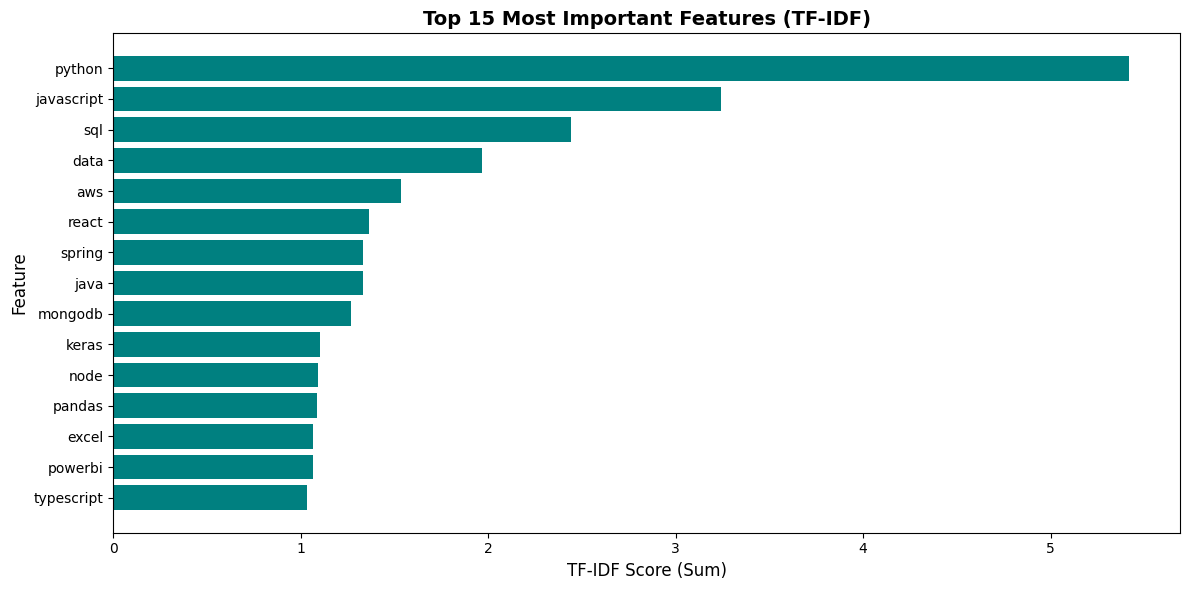

In [59]:
# Visualize top 15 features
plt.figure(figsize=(12, 6))
top_features = feature_df.head(15)
plt.barh(top_features['Feature'], top_features['Total Score'], color='teal')
plt.xlabel('TF-IDF Score (Sum)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features (TF-IDF)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Summary Statistics

In [60]:
# Generate summary statistics
summary = {
    'Total Samples': len(df),
    'Total Features': X.shape[1],
    'Number of Classes': len(label_encoder.classes_),
    'Training Samples': X_train.shape[0],
    'Testing Samples': X_test.shape[0],
    'Feature Matrix Sparsity': f"{(1 - X.nnz / (X.shape[0] * X.shape[1])) * 100:.2f}%"
}

print("\n" + "="*50)
print("FEATURE ENGINEERING SUMMARY")
print("="*50)
for key, value in summary.items():
    print(f"{key:.<30} {value}")
print("="*50)


FEATURE ENGINEERING SUMMARY
Total Samples................. 40
Total Features................ 100
Number of Classes............. 11
Training Samples.............. 32
Testing Samples............... 8
Feature Matrix Sparsity....... 95.93%


## 9. Save Feature Information

In [61]:
# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Save feature information to file
with open('../results/feature_info.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("FEATURE ENGINEERING SUMMARY - DAY 2\n")
    f.write("Student Skill Gap Analyzer & Career Recommendation System\n")
    f.write("="*60 + "\n\n")
    
    f.write("DATASET INFORMATION:\n")
    f.write("-" * 60 + "\n")
    f.write(f"Total Samples: {len(df)}\n")
    f.write(f"Number of Job Roles: {len(label_encoder.classes_)}\n")
    f.write(f"Job Roles: {', '.join(label_encoder.classes_)}\n\n")
    
    f.write("FEATURE EXTRACTION (TF-IDF):\n")
    f.write("-" * 60 + "\n")
    f.write(f"Total Features Extracted: {X.shape[1]}\n")
    f.write(f"Max Features Limit: 100\n")
    f.write(f"N-gram Range: (1, 2)\n")
    f.write(f"Feature Matrix Shape: {X.shape}\n")
    f.write(f"Sparsity: {(1 - X.nnz / (X.shape[0] * X.shape[1])) * 100:.2f}%\n\n")
    
    f.write("TRAIN-TEST SPLIT:\n")
    f.write("-" * 60 + "\n")
    f.write(f"Training Samples: {X_train.shape[0]}\n")
    f.write(f"Testing Samples: {X_test.shape[0]}\n")
    f.write(f"Test Size: 20%\n")
    f.write(f"Random State: 42\n")
    f.write(f"Stratified: No (small dataset)\n\n")
    
    f.write("TOP 20 FEATURES:\n")
    f.write("-" * 60 + "\n")
    for idx, row in feature_df.head(20).iterrows():
        f.write(f"{row['Feature']:.<40} {row['Total Score']:.4f}\n")

print("Feature information saved to: ../results/feature_info.txt")

Feature information saved to: ../results/feature_info.txt


## 10. Key Observations

**Preprocessing Achievements:**
- Successfully cleaned skill text (lowercase, removed special characters, normalized spacing)
- Converted text data to numerical features using TF-IDF
- Encoded job roles as numerical labels

**Feature Engineering Results:**
- Extracted meaningful features representing skills and technologies
- Created sparse feature matrix suitable for machine learning (95.93% sparsity)
- Split data randomly (stratification not used due to small class sizes)
- Training: 32 samples, Testing: 8 samples

**Next Steps (Day 3):**
1. Build baseline classification models
2. Evaluate model performance
3. Experiment with different algorithms
4. Fine-tune hyperparameters